# **Exploratory Data Analysis of Ecologic Variables**

In [1]:
# Libraries
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('AVONETplusClim.csv' )

## **1. Body Size (Mass)**

### **1.1. Mass and Habitat**

To choose the proper statistical test, distribution of Mass is explored based on habitat. Shapiro-Wilk test is done, in which

* H0: The Mass is normally distributed within Habitat groups.
* H1: The Mass is not normally distributed within Habitat groups.

In [2]:
HABITAT_LEVELS = ['Closed', 'Open', 'Aquatic']

df_habitat_mass = df[['Habitat', 'Mass']].copy()
df_habitat_mass = df_habitat_mass[df_habitat_mass['Habitat'].isin(HABITAT_LEVELS)]

###

for group_name in sorted(HABITAT_LEVELS):
    group_data = df_habitat_mass[df_habitat_mass['Habitat'] == group_name]['Mass']

    shapiro_w, shapiro_p = stats.shapiro(group_data)

    print(f"[{group_name}] N={len(group_data)} | p-value: {shapiro_p:.4e}")

[Aquatic] N=847 | p-value: 1.5813e-45
[Closed] N=7961 | p-value: 7.2201e-108
[Open] N=1070 | p-value: 3.6437e-55


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7961.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as ANOVA cannot be used. As an alternative, Kruskal-Wallis test is used, in which

* H0: There is no statistically significant difference in the distribution of Mass across Habitat groups.
* H1: The distribution of Mass differs among at least two Habitat groups.

In [3]:
groups = sorted(df_habitat_mass['Habitat'].unique())
data_groups = [df_habitat_mass[df_habitat_mass['Habitat'] == g]['Mass'] for g in groups]

h_stat, p_val = stats.kruskal(*data_groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_val:.4e}")

H-statistic: 603.9365
P-value: 7.1922e-132


Since p << 0.05, the null hypothesis (H0) is rejected. There is a statistically significant difference in the distribution of Mass among at least two Habitat groups. To see which Habitat groups differ in terms of Mass, Dunn's test is done, in which

* H0: The distribution of Mass is the same for the two Habitat groups tested.
* H1: The distribution of Mass differs between the two Habitat groups tested.

In [4]:
dunn_results = sp.posthoc_dunn(a=df_habitat_mass, 
                                val_col='Mass', 
                                group_col='Habitat', 
                                p_adjust='bonferroni')

groups = sorted(df_habitat_mass['Habitat'].unique())
dunn_results.columns = groups
dunn_results.index = groups

print(dunn_results)

               Aquatic         Closed          Open
Aquatic   1.000000e+00  1.587303e-128  3.887887e-44
Closed   1.587303e-128   1.000000e+00  6.249716e-12
Open      3.887887e-44   6.249716e-12  1.000000e+00


Since p << 0.05, the null hypothesis (H0) is rejected; there are statistically significant differences in Mass distribution between every single pair of Habitat groups. Finally, to illustrate the distribution, a boxplot is created (with log(Mass) for better visualization).

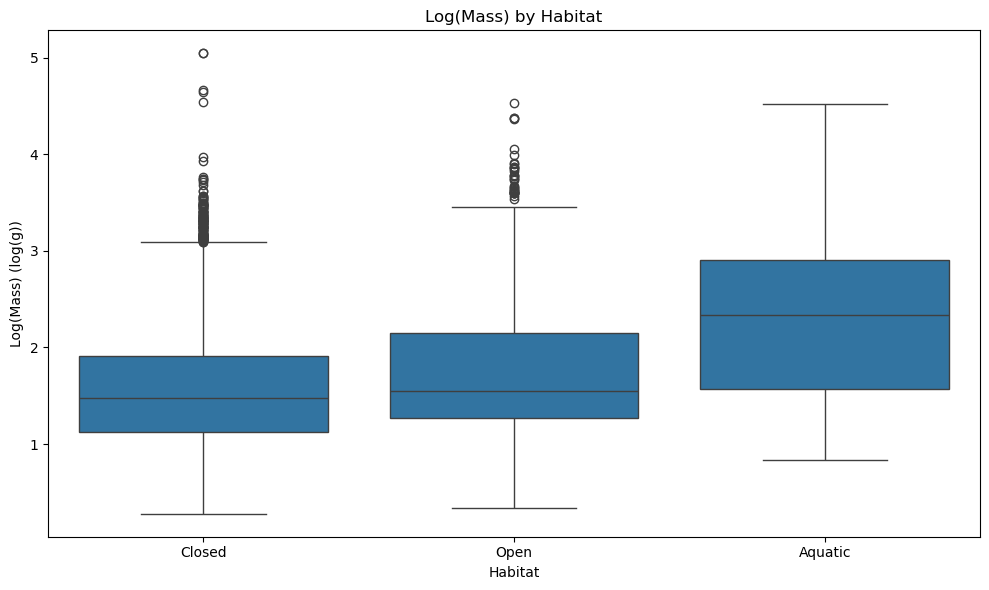

In [5]:
df_habitat_mass['log_Mass'] = np.log10(df_habitat_mass['Mass'])
df_plot = df_habitat_mass[['Habitat', 'log_Mass']].copy()
df_plot = df_plot[df_plot['Habitat'].isin(HABITAT_LEVELS)]
df['Habitat'] = df['Habitat'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitat', y='log_Mass', data=df_plot) 
plt.title('Log(Mass) by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Log(Mass) (log(g))') 
plt.tight_layout()

plt.show()

### **1.2. Mass and Migration**

To choose the proper statistical test, distribution of Mass is explored based on migration behaviour. Shapiro-Wilk test is done, in which

* H0: The mass is normally distributed within Migratory classes.
* H1: The mass is not normally distributed within Migratory classes.

In [6]:
MIGRATION_LEVELS = ['Sedentary', 'Partial', 'Migratory']

df_migration_mass = df[['Migration', 'Mass']].copy()
df_migration_mass = df_migration_mass[df_migration_mass['Migration'].isin(MIGRATION_LEVELS)]

###

for group_name in sorted(MIGRATION_LEVELS):
    group_data = df_migration_mass[df_migration_mass['Migration'] == group_name]['Mass']

    shapiro_w, shapiro_p = stats.shapiro(group_data)

    print(f"[{group_name}] N={len(group_data)} | p-value: {shapiro_p:.4e}")

[Migratory] N=844 | p-value: 5.7401e-48
[Partial] N=993 | p-value: 1.4682e-52
[Sedentary] N=8041 | p-value: 1.2713e-107


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8041.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as ANOVA cannot be used. As an alternative, Kruskal-Wallis test is used, in which

* H0: There is no statistically significant difference in the distribution of Mass across Migratory classes.
* H1: The distribution of Mass differs among at least two Migratory classes.

In [7]:
groups = sorted(df_migration_mass['Migration'].unique())
data_groups = [df_migration_mass[df_migration_mass['Migration'] == g]['Mass'] for g in groups]

h_stat, p_val = stats.kruskal(*data_groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_val:.4e}")

H-statistic: 95.0769
P-value: 2.2611e-21


Since p << 0.05, the null hypothesis (H0) is rejected. There is a statistically significant difference in the distribution of Mass among at least two Migratory classes. To see which Migratory classes differ in terms of Mass, Dunn's test is done, in which

* H0: The distribution of Mass is the same for the two Migratory classes tested.
* H1: The distribution of Mass differs between the two Migratory classes tested.

In [8]:
dunn_results = sp.posthoc_dunn(a=df_migration_mass, 
                                val_col='Mass', 
                                group_col='Migration', 
                                p_adjust='bonferroni')

groups = sorted(df_migration_mass['Migration'].unique())
dunn_results.columns = groups
dunn_results.index = groups

print(dunn_results)

              Migratory       Partial     Sedentary
Migratory  1.000000e+00  2.815545e-07  1.077300e-01
Partial    2.815545e-07  1.000000e+00  1.028333e-21
Sedentary  1.077300e-01  1.028333e-21  1.000000e+00


Between Sedentary and Migratory classes, p > 0.05, thus the null hypothesis (H0) is failed to reject. However, between Partial-Sedentary and Partial-Migratory, p << 0.05, thus there are statistically significant differences in Mass distribution between these Migratory classes. Finally, to illustrate the distribution, a boxplot is created (with log(Mass) for better visualization).

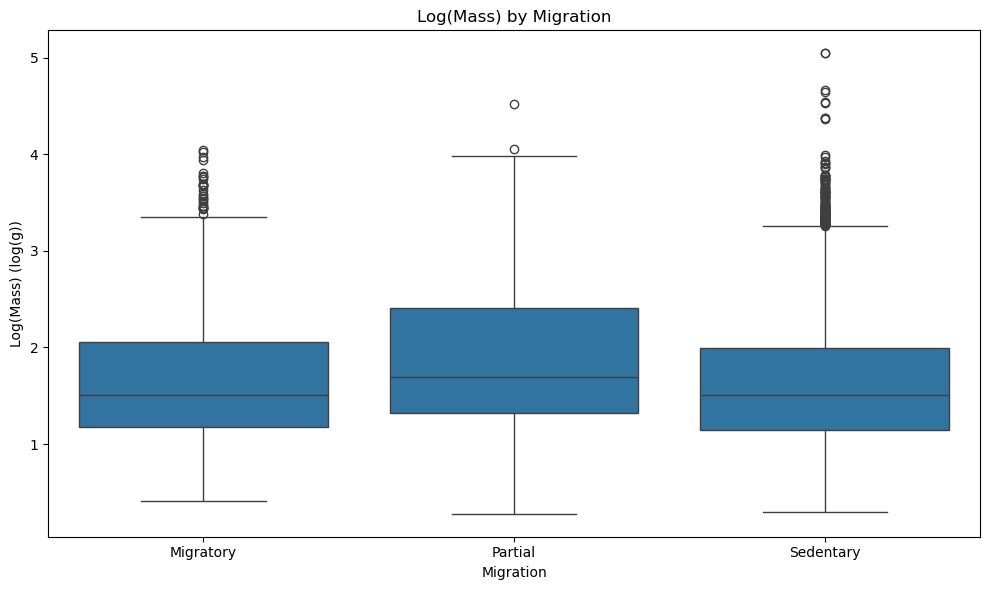

In [9]:
df_migration_mass['log_Mass'] = np.log10(df_migration_mass['Mass'])
df_plot = df_migration_mass[['Migration', 'log_Mass']].copy()
df_plot = df_plot[df_plot['Migration'].isin(MIGRATION_LEVELS)]
df['Migration'] = df['Migration'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Migration', y='log_Mass', data=df_plot) 
plt.title('Log(Mass) by Migration')
plt.xlabel('Migration')
plt.ylabel('Log(Mass) (log(g))') 
plt.tight_layout()

plt.show()

### **1.3. Mass and Nutrition**

To choose the proper statistical test, distribution of Mass is explored based on nutrition. Shapiro-Wilk test is done, in which

* H0: The mass is normally distributed within Trophic levels.
* H1: The mass is not normally distributed within Trophic levels.

In [10]:
TROPHIC_LEVELS = ['Carnivore', 'Herbivore', 'Omnivore']

df_trophic_mass = df[['Trophic.Level', 'Mass']].copy()
df_trophic_mass = df_trophic_mass[df_trophic_mass['Trophic.Level'].isin(TROPHIC_LEVELS)]

###

for group_name in sorted(TROPHIC_LEVELS):
    group_data = df_trophic_mass[df_trophic_mass['Trophic.Level'] == group_name]['Mass']

    shapiro_w, shapiro_p = stats.shapiro(group_data)

    print(f"[{group_name}] N={len(group_data)} | p-value: {shapiro_p:.4e}")

[Carnivore] N=5397 | p-value: 1.3289e-92
[Herbivore] N=2777 | p-value: 3.0609e-79
[Omnivore] N=1684 | p-value: 2.5440e-65


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5397.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as ANOVA cannot be used. As an alternative, Kruskal-Wallis test is used, in which

* H0: There is no statistically significant difference in the distribution of Mass across Trophic levels.
* H1: The distribution of Mass differs among at least two Trophic levels.

In [11]:
groups = sorted(df_trophic_mass['Trophic.Level'].unique())
data_groups = [df_trophic_mass[df_trophic_mass['Trophic.Level'] == g]['Mass'] for g in groups]

h_stat, p_val = stats.kruskal(*data_groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_val:.4e}")

H-statistic: 74.8598
P-value: 5.5513e-17


Since p << 0.05, the null hypothesis (H0) is rejected. There is a statistically significant difference in the distribution of Mass among at least two Trophic levels. To see which Trophic levels differ in terms of Mass, Dunn's test is done, in which

* H0: The distribution of Mass is the same for the two Trophic levels tested.
* H1: The distribution of Mass differs between the two Trophic levels tested.

In [12]:
dunn_results = sp.posthoc_dunn(a=df_trophic_mass, 
                                val_col='Mass', 
                                group_col='Trophic.Level', 
                                p_adjust='bonferroni')

groups = sorted(df_trophic_mass['Trophic.Level'].unique())
dunn_results.columns = groups
dunn_results.index = groups

print(dunn_results)

              Carnivore     Herbivore  Omnivore
Carnivore  1.000000e+00  1.332143e-16  0.000037
Herbivore  1.332143e-16  1.000000e+00  0.049248
Omnivore   3.669346e-05  4.924766e-02  1.000000


Since p < 0.05, the null hypothesis (H0) is rejected; there are statistically significant differences in Mass distribution between every single pair of Trophic levels. Finally, to illustrate the distribution, a boxplot is created (with log(Mass) for better visualization).

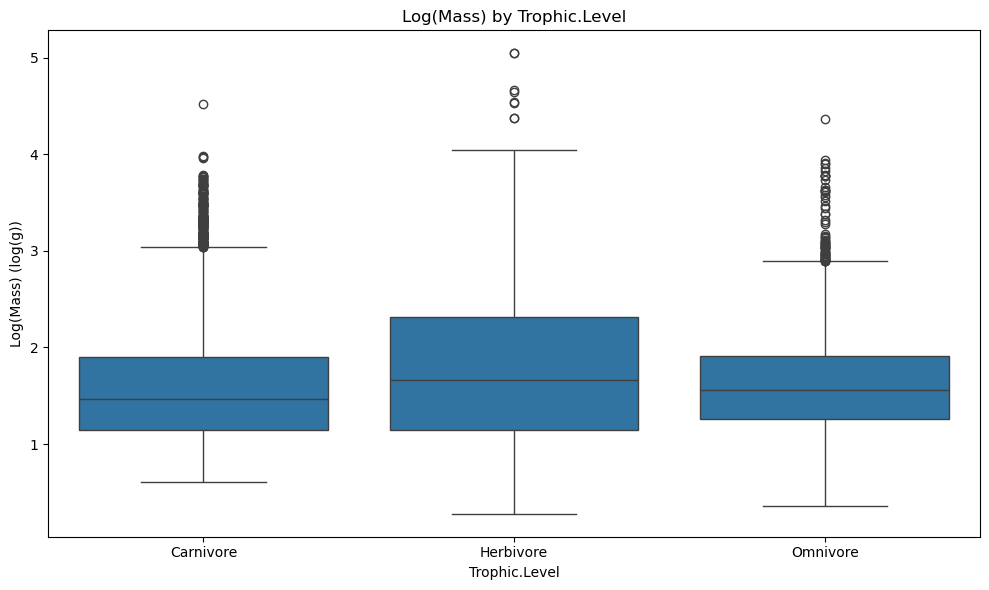

In [13]:
df_trophic_mass['log_Mass'] = np.log10(df_trophic_mass['Mass'])
df_plot = df_trophic_mass[['Trophic.Level', 'log_Mass']].copy()
df_plot = df_plot[df_plot['Trophic.Level'].isin(TROPHIC_LEVELS)]
df['Trophic.Level'] = df['Trophic.Level'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Trophic.Level', y='log_Mass', data=df_plot) 
plt.title('Log(Mass) by Trophic.Level')
plt.xlabel('Trophic.Level')
plt.ylabel('Log(Mass) (log(g))') 
plt.tight_layout()

plt.show()

## **2. Leg Size (Tarsus Length)**

### **2.1. Tarsus Length and Nutrition**

To choose the proper statistical test, distribution of Tarsus Length is explored based on nutrition. Shapiro-Wilk test is done, in which

* H0: The tarsus length is normally distributed within Trophic levels.
* H1: The tarsus length is not normally distributed within Trophic levels.

In [14]:
df_trophic_tarsus = df[['Trophic.Level', 'Tarsus.Length']].copy()
df_trophic_tarsus = df_trophic_tarsus[df_trophic_tarsus['Trophic.Level'].isin(TROPHIC_LEVELS)]

###

for group_name in sorted(TROPHIC_LEVELS):
    group_data = df_trophic_tarsus[df_trophic_tarsus['Trophic.Level'] == group_name]['Tarsus.Length']

    shapiro_w, shapiro_p = stats.shapiro(group_data)

    print(f"[{group_name}] N={len(group_data)} | p-value: {shapiro_p:.4e}")

[Carnivore] N=5397 | p-value: 2.0250e-78
[Herbivore] N=2777 | p-value: 1.3303e-65
[Omnivore] N=1684 | p-value: 7.0805e-57


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5397.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as ANOVA cannot be used. As an alternative, Kruskal-Wallis test is used, in which

* H0: There is no statistically significant difference in the distribution of Tarsus Length across Trophic levels.
* H1: The distribution of Tarsus Length differs among at least two Trophic levels.

In [15]:
groups = sorted(df_trophic_tarsus['Trophic.Level'].unique())
data_groups = [df_trophic_tarsus[df_trophic_tarsus['Trophic.Level'] == g]['Tarsus.Length'] for g in groups]

h_stat, p_val = stats.kruskal(*data_groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_val:.4e}")

H-statistic: 239.5907
P-value: 9.4090e-53


Since p << 0.05, the null hypothesis (H0) is rejected. There is a statistically significant difference in the distribution of Tarsus Length among at least two Trophic levels. To see which Trophic levels differ in terms of Tarsus Length, Dunn's test is done, in which

* H0: The distribution of Tarsus Length is the same for the two Trophic levels tested.
* H1: The distribution of Tarsus Length differs between the two Trophic levels tested.

In [16]:
dunn_results = sp.posthoc_dunn(a=df_trophic_tarsus, 
                                val_col='Tarsus.Length', 
                                group_col='Trophic.Level', 
                                p_adjust='bonferroni')

groups = sorted(df_trophic_tarsus['Trophic.Level'].unique())
dunn_results.columns = groups
dunn_results.index = groups

print(dunn_results)

              Carnivore     Herbivore      Omnivore
Carnivore  1.000000e+00  1.993923e-38  5.675222e-05
Herbivore  1.993923e-38  1.000000e+00  2.001180e-42
Omnivore   5.675222e-05  2.001180e-42  1.000000e+00


Since p < 0.05, the null hypothesis (H0) is rejected; there are statistically significant differences in Tarsus Length distribution between every single pair of Trophic levels. Finally, to illustrate the distribution, a boxplot is created (with log(Length) for better visualization).

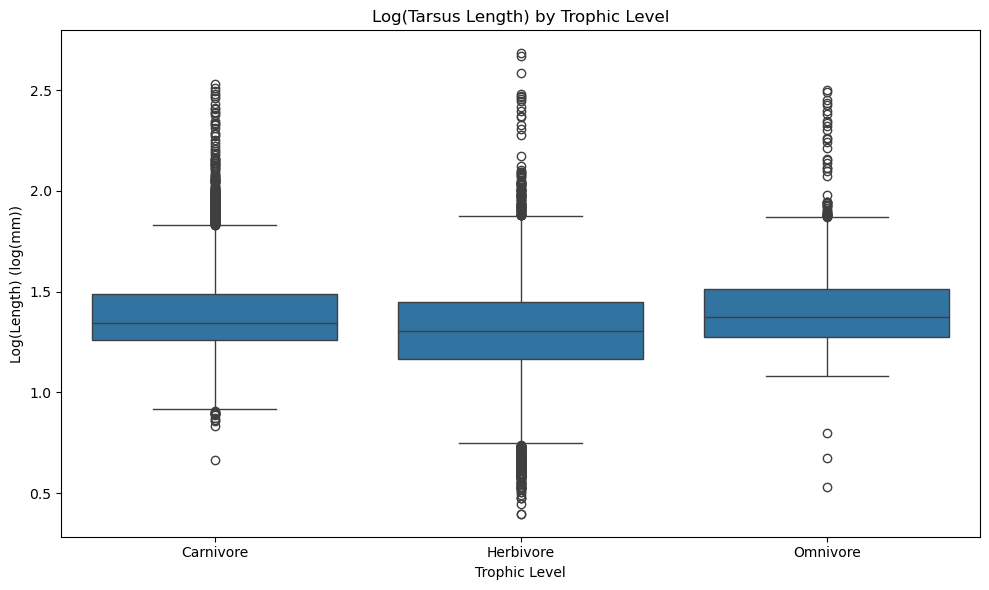

In [17]:
df_trophic_tarsus['log_TarsusLength'] = np.log10(df_trophic_tarsus['Tarsus.Length'])
df_plot = df_trophic_tarsus[['Trophic.Level', 'log_TarsusLength']].copy()
df_plot = df_plot[df_plot['Trophic.Level'].isin(TROPHIC_LEVELS)]
df['Trophic.Level'] = df['Trophic.Level'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Trophic.Level', y='log_TarsusLength', data=df_plot) 
plt.title('Log(Tarsus Length) by Trophic Level')
plt.xlabel('Trophic Level')
plt.ylabel('Log(Length) (log(mm))') 
plt.tight_layout()

plt.show()

### **2.2. Tarsus Length and Habitat**

To choose the proper statistical test, distribution of Tarsus length is explored based on habitat. Shapiro-Wilk test is done, in which

* H0: The Tarsus length is normally distributed within Habitat groups.
* H1: The Tarsus length is not normally distributed within Habitat groups.

In [18]:
df_habitat_tarsus = df[['Habitat', 'Tarsus.Length']].copy()
df_habitat_tarsus = df_habitat_tarsus[df_habitat_tarsus['Habitat'].isin(HABITAT_LEVELS)]

###

for group_name in sorted(HABITAT_LEVELS):
    group_data = df_habitat_tarsus[df_habitat_tarsus['Habitat'] == group_name]['Tarsus.Length']

    shapiro_w, shapiro_p = stats.shapiro(group_data)

    print(f"[{group_name}] N={len(group_data)} | p-value: {shapiro_p:.4e}")

[Aquatic] N=847 | p-value: 6.9535e-38
[Closed] N=7961 | p-value: 4.8325e-85
[Open] N=1070 | p-value: 1.0283e-45


/home/emrekisacik/miniconda3/envs/DSA210/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7961.
  res = hypotest_fun_out(*samples, **kwds)


Since p << 0.05, the null hypothesis (H0) is rejected. The data is not normally distributed. Therefore, parametric tests such as ANOVA cannot be used. As an alternative, Kruskal-Wallis test is used, in which

* H0: There is no statistically significant difference in the distribution of Tarsus length across Habitat groups.
* H1: The distribution of Tarsus length differs among at least two Habitat groups.

In [19]:
groups = sorted(df_habitat_tarsus['Habitat'].unique())
data_groups = [df_habitat_tarsus[df_habitat_tarsus['Habitat'] == g]['Tarsus.Length'] for g in groups]

h_stat, p_val = stats.kruskal(*data_groups)

print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_val:.4e}")

H-statistic: 564.5811
P-value: 2.5280e-123


Since p << 0.05, the null hypothesis (H0) is rejected. There is a statistically significant difference in the distribution of Tarsus length among at least two Habitat groups. To see which Habitat groups differ in terms of Tarsus length, Dunn's test is done, in which

* H0: The distribution of Tarsus length is the same for the two Habitat groups tested.
* H1: The distribution of Tarsus length differs between the two Habitat groups tested.

In [20]:
dunn_results = sp.posthoc_dunn(a=df_habitat_tarsus, 
                                val_col='Tarsus.Length', 
                                group_col='Habitat', 
                                p_adjust='bonferroni')

groups = sorted(df_habitat_tarsus['Habitat'].unique())
dunn_results.columns = groups
dunn_results.index = groups

print(dunn_results)

               Aquatic         Closed          Open
Aquatic   1.000000e+00  1.468675e-118  2.468215e-37
Closed   1.468675e-118   1.000000e+00  9.372255e-14
Open      2.468215e-37   9.372255e-14  1.000000e+00


Since p << 0.05, the null hypothesis (H0) is rejected; there are statistically significant differences in Tarsus length distribution between every single pair of Habitat groups. Finally, to illustrate the distribution, a boxplot is created (with log(Length) for better visualization).

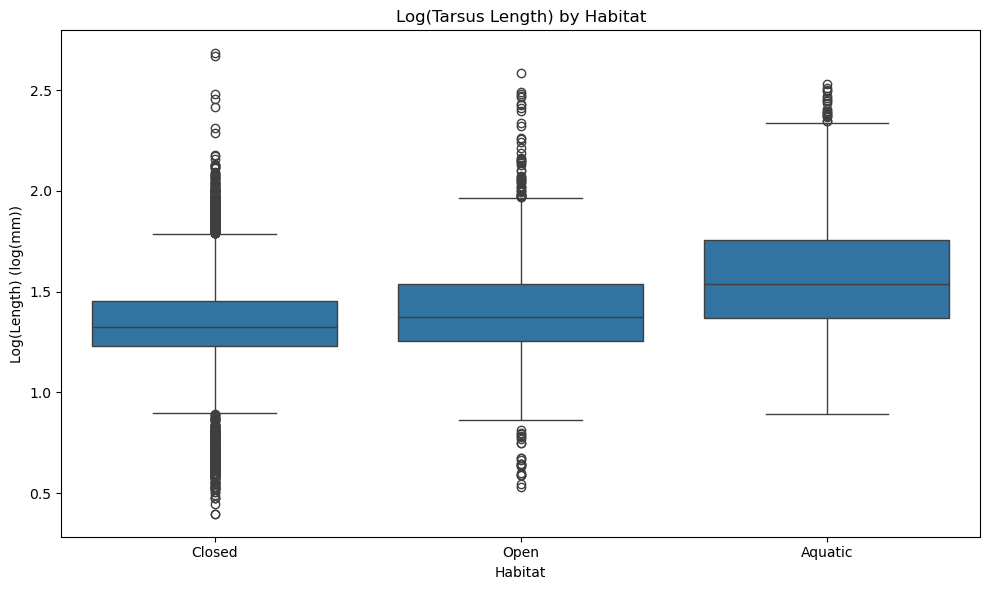

In [21]:
df_habitat_tarsus['log_TarsusLength'] = np.log10(df_habitat_tarsus['Tarsus.Length'])
df_plot = df_habitat_tarsus[['Habitat', 'log_TarsusLength']].copy()
df_plot = df_plot[df_plot['Habitat'].isin(HABITAT_LEVELS)]
df['Habitat'] = df['Habitat'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitat', y='log_TarsusLength', data=df_plot) 
plt.title('Log(Tarsus Length) by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Log(Length) (log(mm))') 
plt.tight_layout()

plt.show()